In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wandb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import font_manager

font_dirs = ["./"]
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
    font_manager.fontManager.addfont(font_file)
    
sns.set( font = "Helvetica" )
api = wandb.Api()

data_name = 'dixit2016'

# Project is specified by <entity/project-name> please replace it with your project name here:
# runs = api.runs("kexinhuang/pert_gnn_simulation_" + data_name)
runs = api.runs("yroohani/dixit")

summary_list, config_list, name_list = [], [], []
for run in runs: 
    # .summary contains the output keys/values for metrics like accuracy.
    #  We call ._json_dict to omit large files 
    summary_list.append(run.summary._json_dict)

    # .config contains the hyperparameters.
    #  We remove special values that start with _.
    config_list.append(
        {k: v for k,v in run.config.items()
          if not k.startswith('_')})

    # .name is the human-readable name of the run.
    name_list.append(run.name)

runs_df = pd.DataFrame({
    "summary": summary_list,
    "config": config_list,
    "name": name_list
    })

In [8]:
### Make sure the run names match exactly with the wandb names!!

run = 6
#cpa_runs = ['CPA_' + str(i) for i in range(1, run)]
pertnet_runs = ['preprint_benchmark_gears_' + str(i) for i in range(1, run)]
no_perturb_runs = ['preprint_benchmark_no_perturb' + str(i) for i in range(1, run)]
#linear_runs = ['Linear_' + str(i) for i in range(1, run)]

In [9]:
res_df = runs_df[runs_df.name.isin(pertnet_runs + no_perturb_runs)]

In [10]:
res_df

,summary,config,name
0,{'test_combo_seen1_mse_top20_de_non_dropout': ...,"{'G_go': None, 'device': 'cuda:1', 'num_genes'...",preprint_benchmark_no_perturb5
1,"{'test_combo_seen2_mse_de': 'NaN', 'test_combo...","{'G_go': None, 'device': 'cuda:1', 'num_genes'...",preprint_benchmark_no_perturb4
2,"{'_wandb': {'runtime': 117}, 'test_pearson_del...","{'G_go': None, 'device': 'cuda:1', 'num_genes'...",preprint_benchmark_no_perturb3
3,"{'test_de_pearson': 0.8856293090301502, 'test_...","{'G_go': None, 'device': 'cuda:1', 'num_genes'...",preprint_benchmark_no_perturb2
4,"{'test_combo_seen1_mse_de': 'NaN', 'test_combo...","{'G_go': None, 'device': 'cuda:1', 'num_genes'...",preprint_benchmark_no_perturb1
5,"{'test_mse': 0.0014831171138212085, '_timestam...","{'G_go': None, 'device': 'cuda:1', 'num_genes'...",preprint_benchmark_gears_5
6,"{'val_de_mse': 0.054215800017118454, 'test_fra...","{'G_go': None, 'device': 'cuda:1', 'num_genes'...",preprint_benchmark_gears_4
7,"{'test_combo_seen1_mse_de': 'NaN', 'test_combo...","{'G_go': None, 'device': 'cuda:1', 'num_genes'...",preprint_benchmark_gears_3
8,"{'test_combo_seen1_pearson_de': 'NaN', 'test_c...","{'G_go': None, 'device': 'cuda:1', 'num_genes'...",preprint_benchmark_gears_2
9,{'test_combo_seen2_frac_opposite_direction_top...,"{'G_go': None, 'device': 'cuda:0', 'num_genes'...",preprint_benchmark_gears_1


In [11]:
def normalize_name(x):
    if x in pertnet_runs:
        return 'GEARS'
    else:
        return 'No-Perturb'

In [12]:
metrics = ['test_mse_top20_de_non_dropout', 'test_pearson_delta']
metrics_name_map = {'test_mse_top20_de_non_dropout': 'Top 20 DE MSE',
                   'test_pearson_delta': 'Pearson Correlation Across All Genes'}
out = {}
out['method'] = [normalize_name(i) for i in res_df.name.values]
for m in metrics:
    out[metrics_name_map[m]] = res_df.summary.apply(lambda x: x[m])
out = pd.DataFrame(out)

In [13]:
color_pal = {
'GEARS': (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
'No-Perturb': (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)}

In [14]:
pal_order = [color_pal[i] for i in pd.DataFrame(out).method.unique()]

In [15]:
import numpy as np
normalize = np.mean(out[out.method == 'No-Perturb']['Top 20 DE MSE'])
out['Normalized MSE of Top 20 DE Genes'] = out['Top 20 DE MSE'].values/normalize

In [16]:
out

,method,Top 20 DE MSE,Pearson Correlation Across All Genes,Normalized MSE of Top 20 DE Genes
0,No-Perturb,0.073700,0.108426,0.819798
1,No-Perturb,0.102093,-0.044170,1.135621
2,No-Perturb,0.120793,-0.001208,1.343624
3,No-Perturb,0.077142,0.017341,0.858084
4,No-Perturb,0.075775,-0.002066,0.842873
5,GEARS,0.055481,0.006654,0.617135
6,GEARS,0.023125,0.788786,0.257226
7,GEARS,0.040938,0.640574,0.455363
8,GEARS,0.030905,0.516193,0.343766
9,GEARS,0.023171,0.800706,0.257745


/dfs/user/yhr/deepamp/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


(0.2, 1.3)

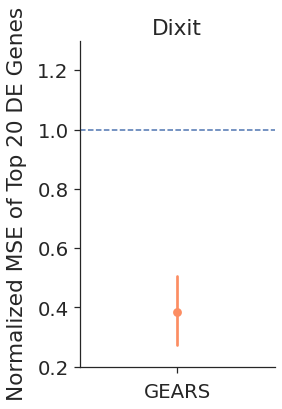

In [17]:
sns.set(rc={'figure.figsize':(3.5,6)})
sns.set_theme(style="ticks", rc={"axes.facecolor": (0, 0, 0, 0)}, font = "Helvetica", font_scale=1.8)

g = sns.pointplot('method', 'Normalized MSE of Top 20 DE Genes', 
    data=pd.DataFrame(out), 
    order = ['GEARS'], 
    hue = 'method',
    palette=[color_pal['GEARS']],              
    dodge=True, 
    join=False,
    hue_order = ['GEARS'])
sns.despine()
g.legend_.remove()
g.set(xlabel=None)
g.axhline(1, linestyle="dashed")

plt.ylabel("Normalized MSE of Top 20 DE Genes",labelpad=10)
plt.tick_params(axis='x', which='major', pad=10)
plt.tick_params(axis='y', which='major', pad=5)
#g.spines['left'].set_linewidth(0.8)
#g.spines['bottom'].set_linewidth(0.8)
plt.title('Dixit')
plt.savefig('output_' + data_name + '.pdf', bbox_inches='tight')
plt.ylim(0.2, 1.3)
